# 1. Import bibliotek

Zaimportowac wszystkie biblioteki wraz z `jupyter` i `plotly`. Zrestartować potem kernel

In [32]:
import pandas as pd
import numpy as np
import os
import pickle


import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

%matplotlib inline


# 2. Przygotowanie danych do analizy

In [33]:
base_data = pd.read_csv("../Lab03/datasets/DSP_6.csv")

In [34]:
train = pd.read_csv('../Lab03/datasets/DSP_6.csv')

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Brakujące dane

In [36]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

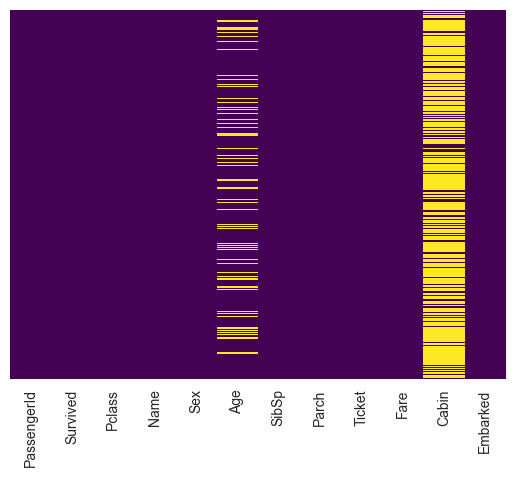

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Wywalamy kolumnę z brakującymi danymi

In [38]:
train.drop(columns=["Cabin"], inplace=True)

<Axes: >

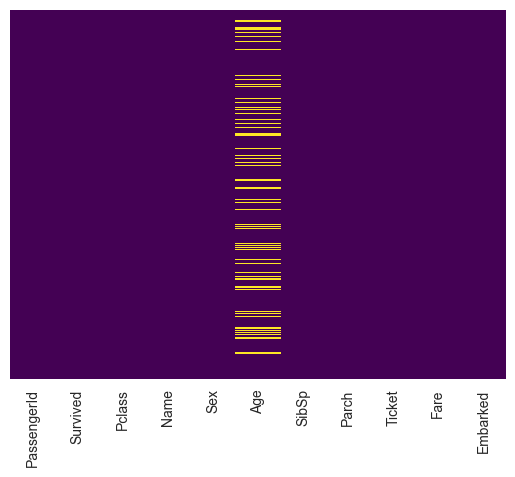

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Znajduję puste wartości

In [40]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

Uuzupełniamy brakujące dane średnią

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

<Axes: >

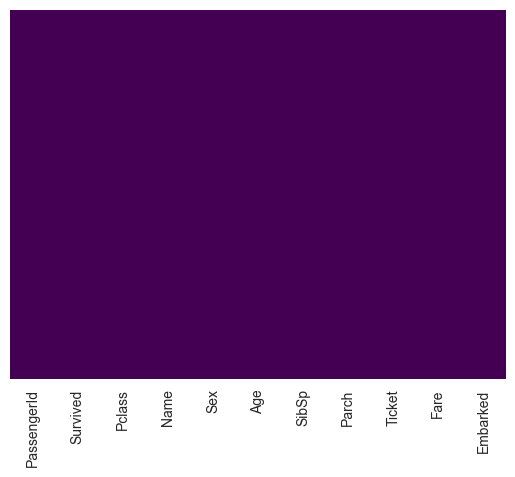

In [43]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [44]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

Odrzucamy wiersze z brakującymi danymi

In [45]:
train.dropna(inplace=True)

<Axes: >

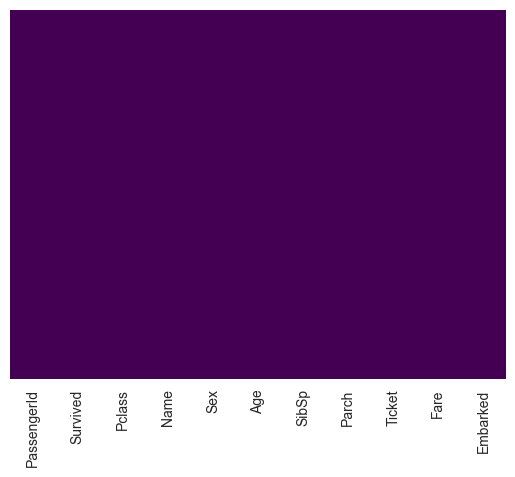

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [47]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Eksploracja danych

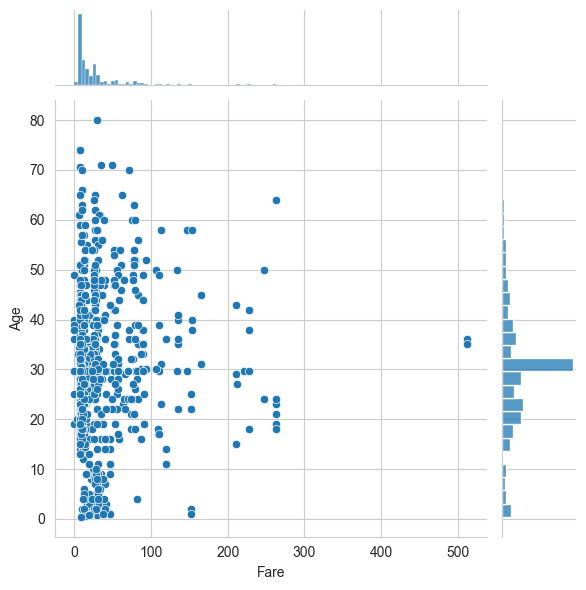

In [48]:
sns.jointplot(x="Fare", y="Age", data=train)

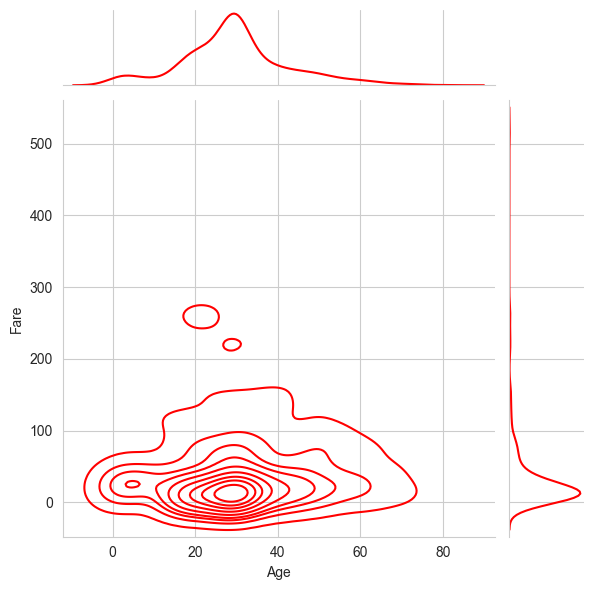

In [49]:
sns.jointplot(x="Age", y="Fare", data=train, color='red', kind='kde')

<Axes: xlabel='Survived', ylabel='count'>

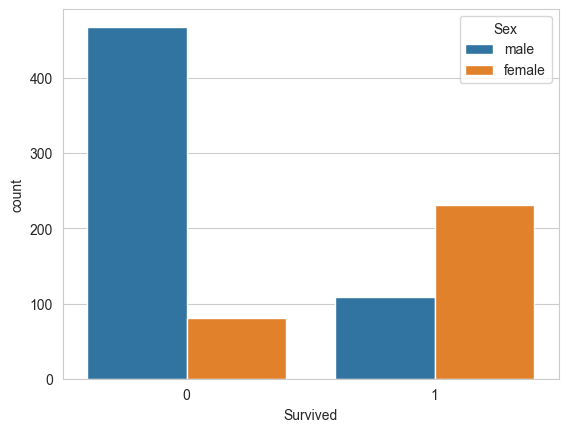

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

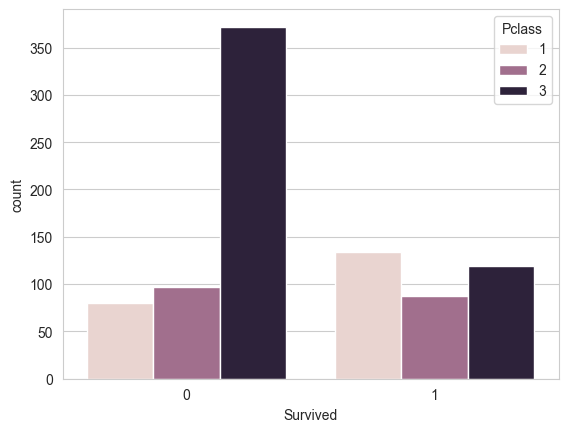

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Pclass")

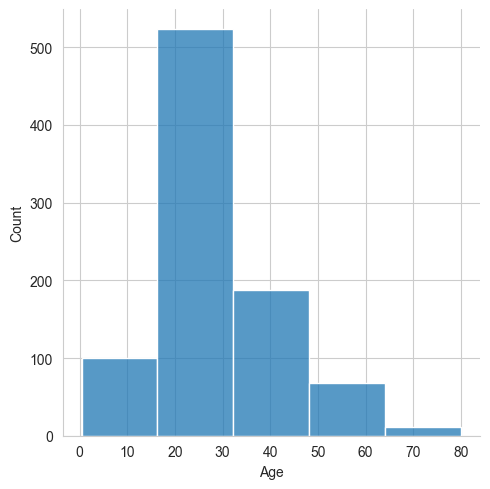

In [52]:
sns.displot(train['Age'], kde=False, bins=5)

C:\Users\s20901\AppData\Local\Temp\ipykernel_10024\4008262194.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

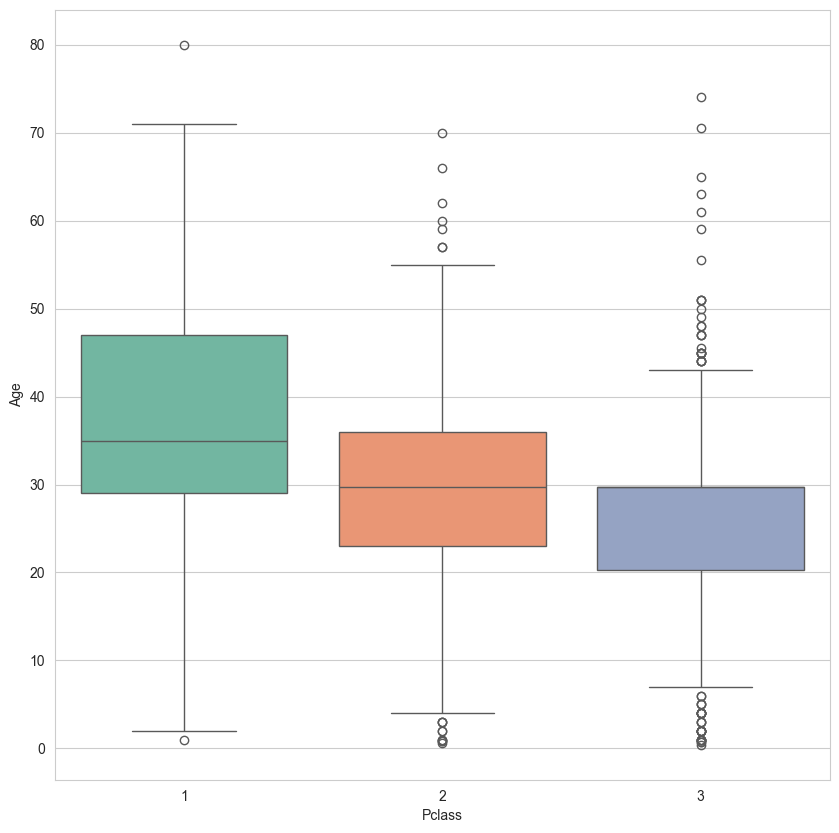

In [53]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='Set2')

In [54]:
cf.go_offline()

In [55]:
train["Age"].iplot(kind="hist", bins=30)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Konwersja zmiennych

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(train["Sex"], drop_first=True)


In [ ]:
lab_enc = LabelEncoder()
train["Embarked"] = lab_enc.fit_transform(train["Embarked"])

In [ ]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0


In [ ]:
train = pd.concat([train, sex], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,True


In [ ]:
train.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 2.4 Zapis danych do pliku

In [31]:
train.to_csv("train.csv", index=False)

# 3. Trenowanie modelu

In [180]:
X = train.drop("Survived", axis=1)
y=train["Survived"]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [182]:
def model (x_train, y_train):
    forest = RandomForestClassifier(n_estimators=10, random_state=0) # random state bez ziarna może zwracać różne wyniki. To spowoduje, że każde uruchomienie d ataki samy wynik
    forest.fit(x_train, y_train)
    print(f"Las: {forest.score(x_train, y_train)}")

    lreg = LogisticRegression(max_iter=500) 
    lreg.fit(x_train, y_train)
    print(f"Regresja logistyczna:  {lreg.score(x_train, y_train)}")

    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)
    print(f"Drrzewa: {tree.score(x_train, y_train)}")

    return forest, lreg, tree
forest, lreg, tree = model(X_train, y_train)

Las: 0.9675
Regresja logistyczna:  0.79
Drrzewa: 0.98375


In [183]:
y1_pred = forest.predict(X_test)
print(f"Random Forest: {accuracy_score(y_test, y1_pred)}")

y2_pred = lreg.predict(X_test)
print(f"Logistic Regression: {accuracy_score(y_test, y2_pred)}")

y3_pred = tree.predict(X_test)
print(f"Decision tree: {accuracy_score(y_test, y3_pred)}")

Random Forest: 0.8314606741573034
Logistic Regression: 0.8426966292134831
Decision tree: 0.7640449438202247


In [184]:
print("Ocena modelu 1. Las losowy")
print(classification_report(y_test, y1_pred))

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test, y1_pred))

print("Ocena modelu 1. Drzewa decyzyjne")
print(classification_report(y_test, y1_pred))


Ocena modelu 1. Las losowy
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        57
           1       0.81      0.69      0.75        32

    accuracy                           0.83        89
   macro avg       0.83      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        57
           1       0.81      0.69      0.75        32

    accuracy                           0.83        89
   macro avg       0.83      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89

Ocena modelu 1. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        57
           1       0.81      0.69      0.75        32

    accuracy                           0.83        89
   macro avg       0.83      0.

# Eksport modelu

In [185]:
filename = "model.h5"
pickle.dump(forest, open(filename, "wb"))

In [37]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [39]:
confusion_matrix(y_test, predictions)

array([[52,  5],
       [ 8, 24]], dtype=int64)

# Zadanie 1

*Załaduj ponownie zbiór danych (`DSP_6.csv`), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach - wyświetl liczbę brakujących danych.*

In [40]:
df = pd.read_csv('Lab03/datasets/DSP_6.csv')
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Zadanie 2

*Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru `figsize`.*

In [41]:
# Wyświetlenie liczby członków rodziny na pokładzie
df["Liczba członków rodziny"] = df["SibSp"] + df["Parch"]

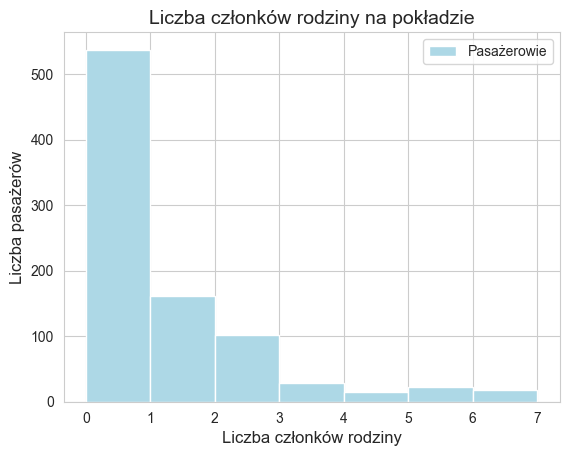

In [42]:
plt.hist(df["Liczba członków rodziny"],
         bins=range(0, 8),
         color="lightblue")
plt.title("Liczba członków rodziny na pokładzie", fontsize=14)
plt.xlabel("Liczba członków rodziny", fontsize=12)
plt.ylabel("Liczba pasażerów", fontsize=12)
plt.xticks(range(0, 8))
plt.legend(["Pasażerowie"], loc="upper right")

plt.show()


Text(0.5, 1.0, 'Rozkład opłat za bilety')

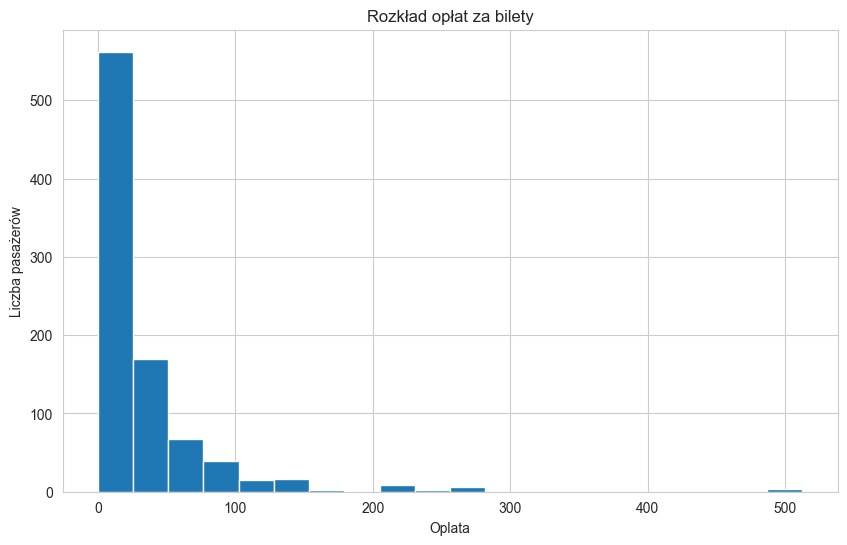

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=20)
plt.xlabel('Oplata')
plt.ylabel('Liczba pasażerów')
plt.title('Rozkład opłat za bilety')